In [1]:
# import libraries

import pandas as pd                      # for data manipulation
import numpy as np

import matplotlib.pyplot as plt          # for data visualisation
import seaborn as sns

import datetime as dt                    # for time date data

In [51]:
# import data

data = pd.read_csv('/content/2017_Yellow_Taxi_Trip_Data.csv')

In [25]:
data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
# total columns

len(data.columns)

18

In [5]:
# total rows



In [6]:
data.size

408582

In [7]:
data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

There is no missing data from the results of info function.

### Outlier Check

In [52]:
# convert date columns to datetime

data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

**trip_distance**

<Axes: title={'center': 'trip_distance'}, xlabel='trip_distance'>

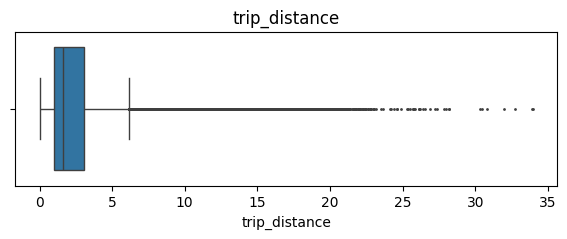

In [10]:
# create box plot

plt.figure(figsize =(7,2))
plt.title('trip_distance')
sns.boxplot(data = None, x = data['trip_distance'], fliersize = 1)

<Axes: title={'center': 'Trip Distance Histogram'}, xlabel='trip_distance', ylabel='Count'>

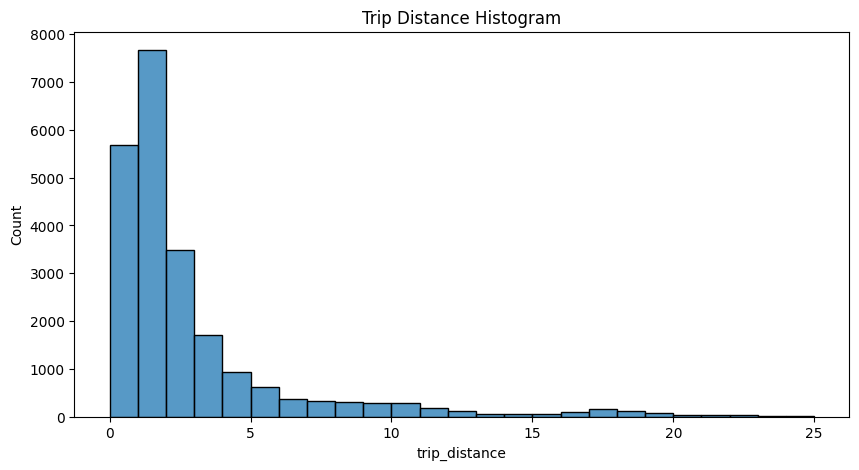

In [11]:
# create histogram

plt.figure(figsize = (10,5))
plt.title('Trip Distance Histogram')
sns.histplot(data['trip_distance'], bins = range(0,26,1))

The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.

**total_amount**

<Axes: title={'center': 'total_amount'}, xlabel='total_amount'>

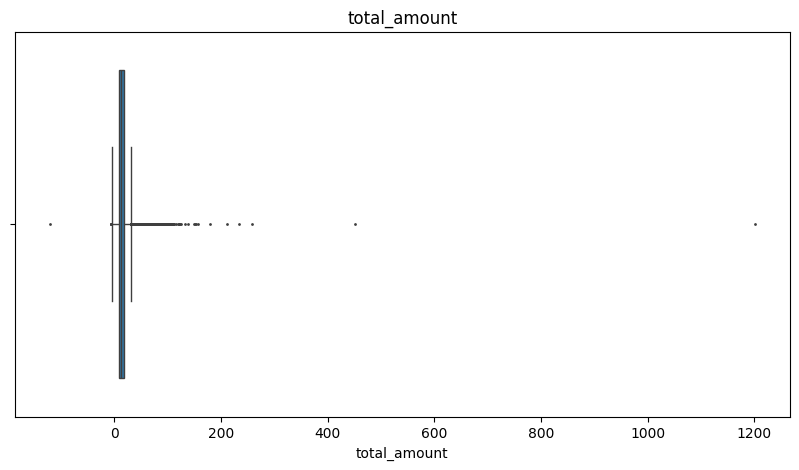

In [12]:
# create a box plot

plt.figure(figsize = (10,5))
plt.title('total_amount')
sns.boxplot(x = data['total_amount'], fliersize = 1)

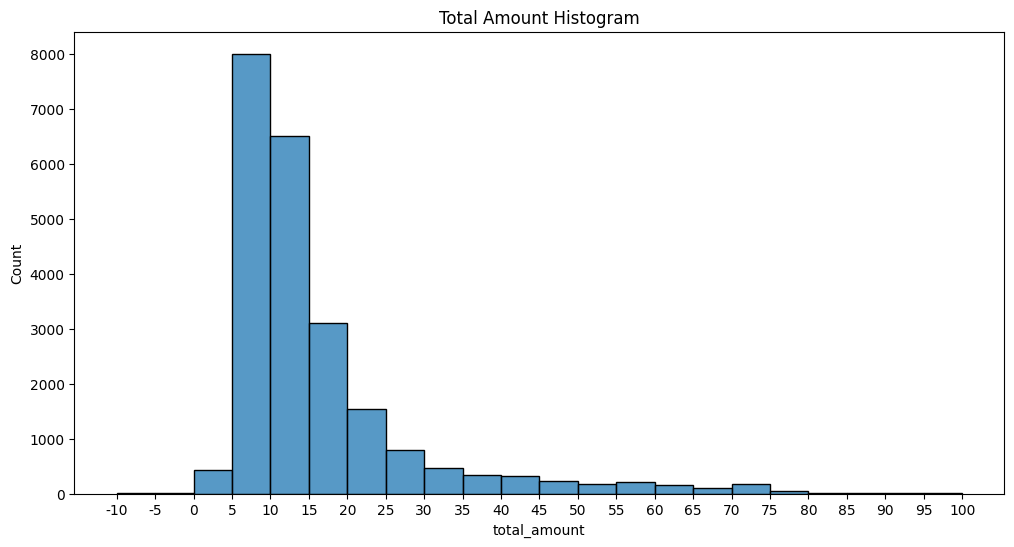

In [13]:
# histogram

plt.figure(figsize = (12,6))
plt.title('Total Amount Histogram')
ax = sns.histplot(data['total_amount'], bins = range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.show()

The total cost of each trip also has a distribution that skews right, with most costs falling in the $5-15 range.

**tip_amount**

<Axes: title={'center': 'tip_amount'}, xlabel='tip_amount'>

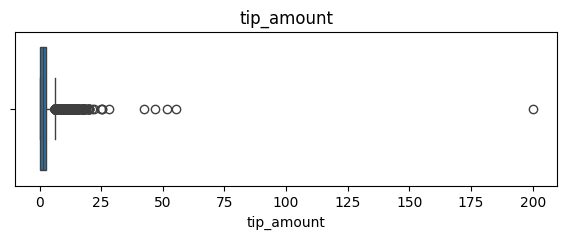

In [14]:
# box plot

plt.figure(figsize = (7,2))
plt.title('tip_amount')
sns.boxplot(x = data['tip_amount'])

<Axes: title={'center': 'Tip amount'}, xlabel='tip_amount', ylabel='Count'>

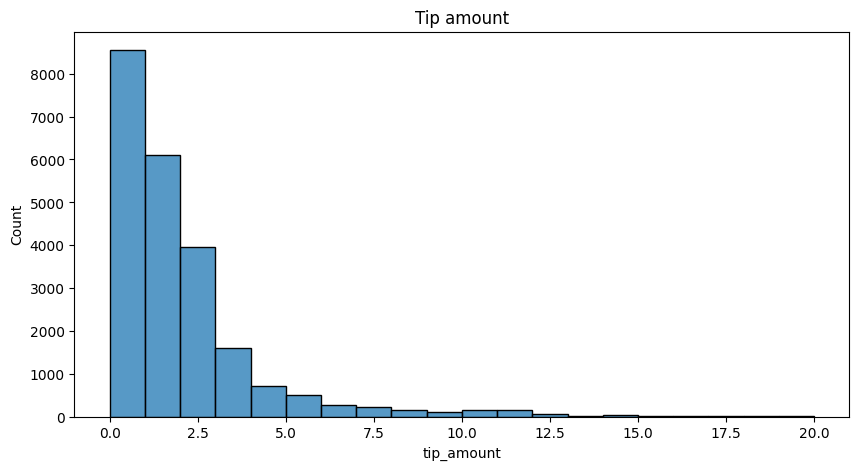

In [15]:
# histogram

plt.figure(figsize = (10,5))
plt.title('Tip amount')
sns.histplot(data['tip_amount'], bins = range(0,21,1))

The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range.

**tip_amount by vendor**

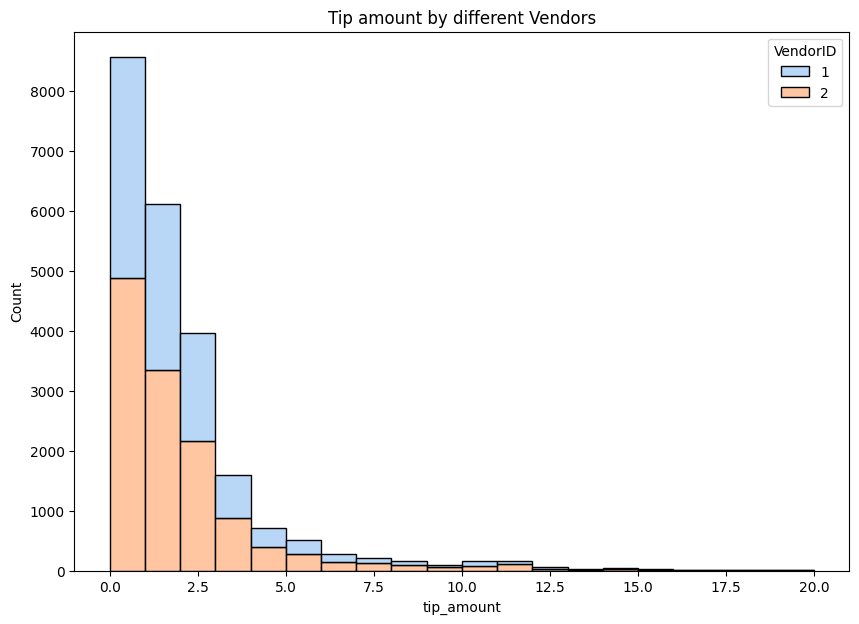

In [16]:
# histogram by different vendors

plt.figure(figsize = (10, 7))
plt.title('Tip amount by different Vendors')
ax = sns.histplot(data = data, x = 'tip_amount', bins = range(0,21,1),
                  hue = 'VendorID',
                  multiple = 'stack',
                  palette = 'pastel')


Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

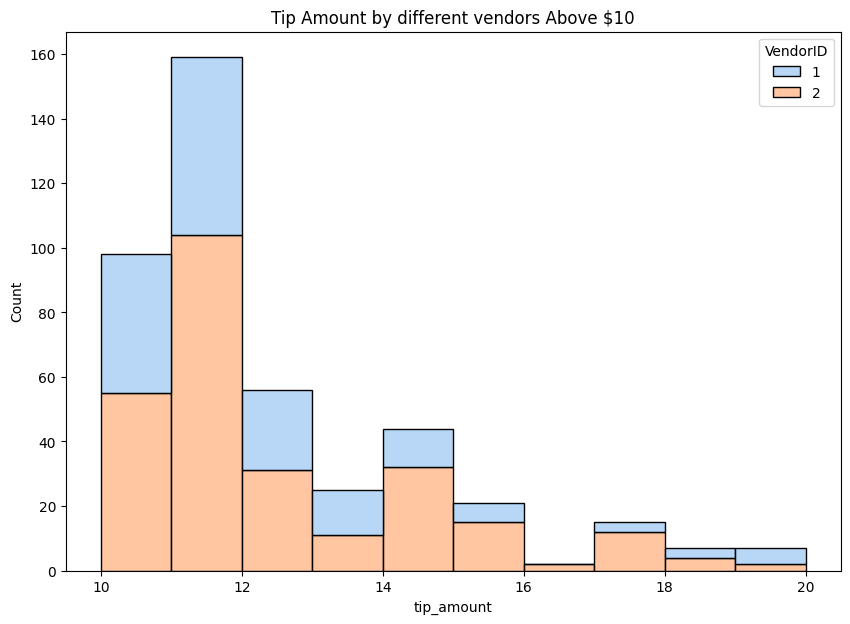

In [17]:
# histogram of tip amount by vendor for tips > $ 10

tips_over_ten = data[data['tip_amount']> 10]

plt.figure(figsize = (10,7))
plt.title('Tip Amount by different vendors Above $10')

ax = sns.histplot(data = tips_over_ten, x = 'tip_amount', bins = range(10,21,1),
                  hue = 'VendorID',
                  multiple = 'stack',
                  palette = 'pastel')
plt.show()

The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

**Mean tips by passenger count**

In [18]:
data['passenger_count'].value_counts()

,count
passenger_count,
1,16117
2,3305
5,1143
3,953
6,693
4,455
0,33


- Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers.
- Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.

In [19]:
# Calculate mean tips by passenger_count

mean_tips = data.groupby(['passenger_count']).mean(numeric_only = True)[['tip_amount']]
mean_tips

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


<ipython-input-23-3b7eaf3cfb8b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index,
<ipython-input-23-3b7eaf3cfb8b>:9: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=data.index,


Text(0.5, 1.0, 'Mean tip amount by passenger count')

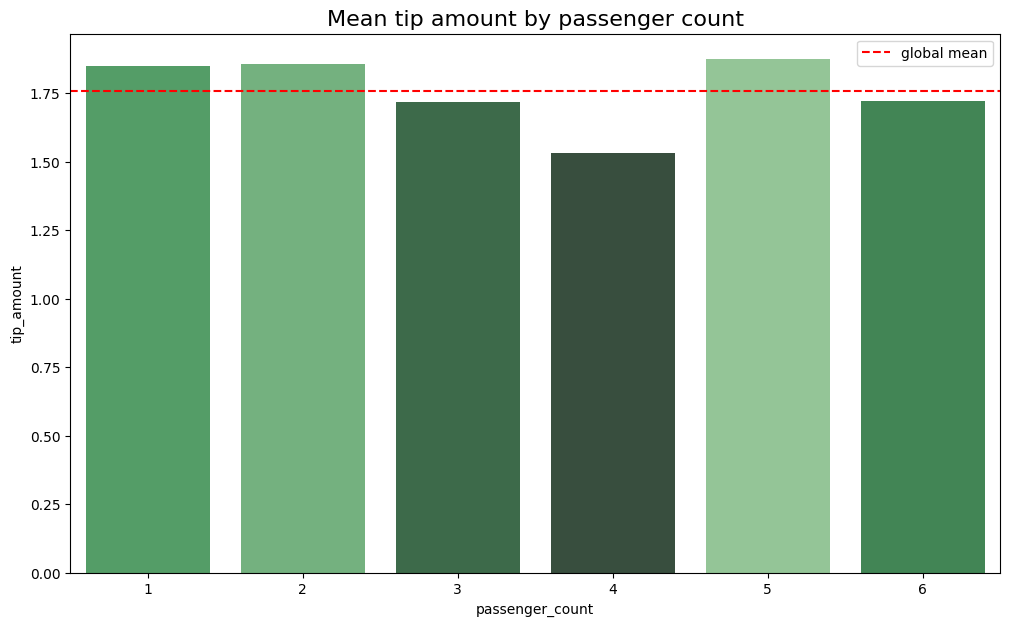

In [23]:
# bar plot

data1 = mean_tips.tail(-1)
pal = sns.color_palette('Greens_d', len(data))

rank = data['tip_amount'].argsort().argsort()

plt.figure(figsize = (12,7))
ax = sns.barplot(x=data.index,
            y=data['tip_amount'],
            palette=np.array(pal[::-1])[rank])
ax.axhline(data['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16)

Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

**Create month and day columns**

In [29]:
# month column
data['month'] = data['tpep_pickup_datetime'].dt.month_name()

# day column
data['day'] = data['tpep_pickup_datetime'].dt.day_name()

**Total rides by month**

In [30]:
monthly_rides = data['month'].value_counts()
monthly_rides

,count
month,
March,2049
October,2027
April,2019
May,2013
January,1997
June,1964
December,1863
November,1843
February,1769


Months are out of order

In [31]:
# reordering months

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index = month_order)
monthly_rides

,count
month,
January,1997
February,1769
March,2049
April,2019
May,2013
June,1964
July,1697
August,1724
September,1734


<ipython-input-33-7f1d00bb590e>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

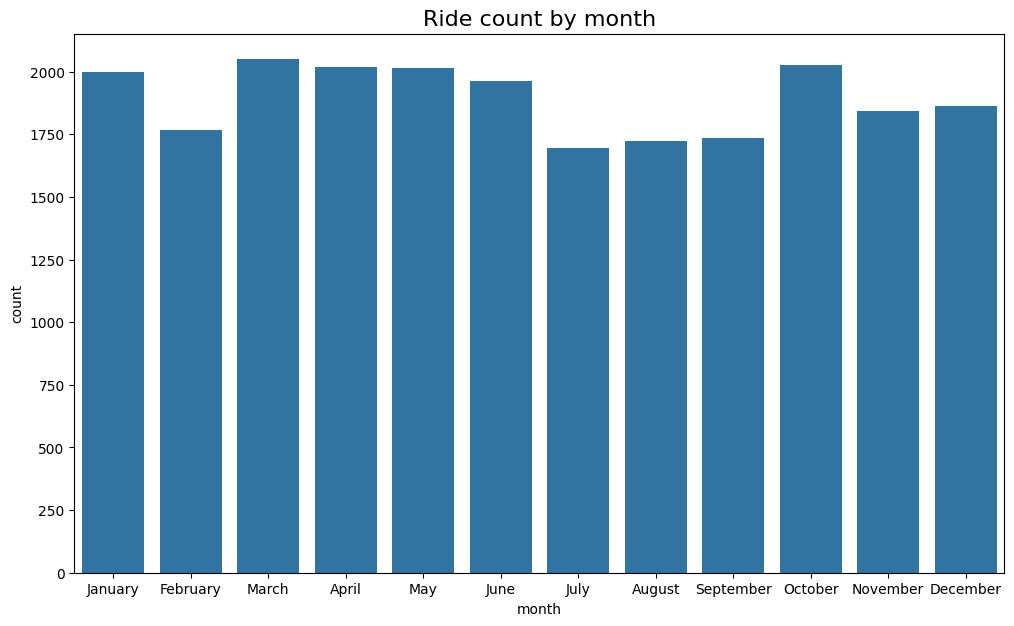

In [33]:
# creating bar plot of total rides

plt.figure(figsize = (12,7))
plt.title('Ride count by month', fontsize = 16)
ax = sns.barplot(x = monthly_rides.index, y = monthly_rides)
ax.set_xticklabels(month_order)

Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

**Plot ride count by days**

In [34]:
daily_rides = data['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index = day_order)
daily_rides

,count
day,
Monday,2931
Tuesday,3198
Wednesday,3390
Thursday,3402
Friday,3413
Saturday,3367
Sunday,2998


<ipython-input-37-5b64c7bc2c79>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


Text(0, 0.5, 'Count')

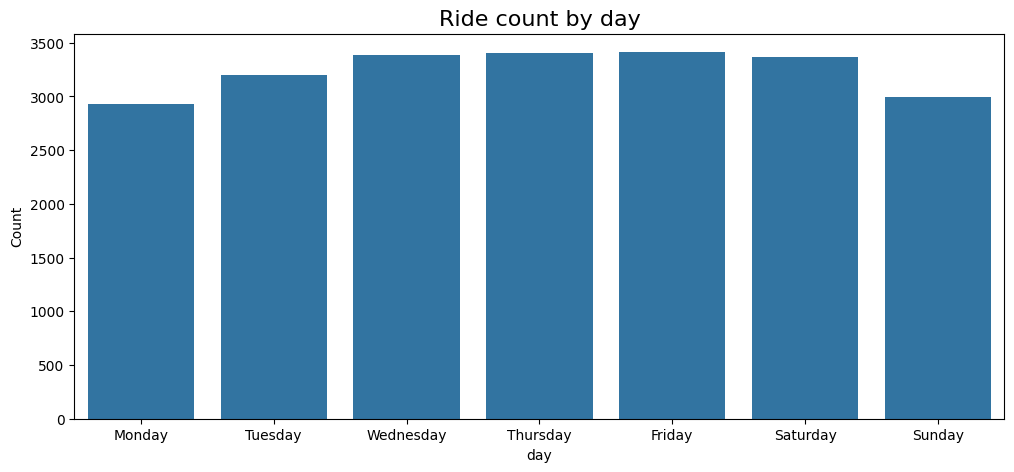

In [37]:
# bar plot

plt.figure(figsize = (12,5))
plt.title('Ride count by day', fontsize = 16)
ax = sns.barplot(x = daily_rides.index, y = daily_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')

Suprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

**Plotting total revenue by day of the week**

In [40]:
day_order = day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = data.groupby('day').sum(numeric_only = True)['total_amount']
total_amount_day = total_amount_day.reindex(index = day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


<ipython-input-42-e72ab06f2d1a>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


Text(0, 0.5, 'Revenue (USD)')

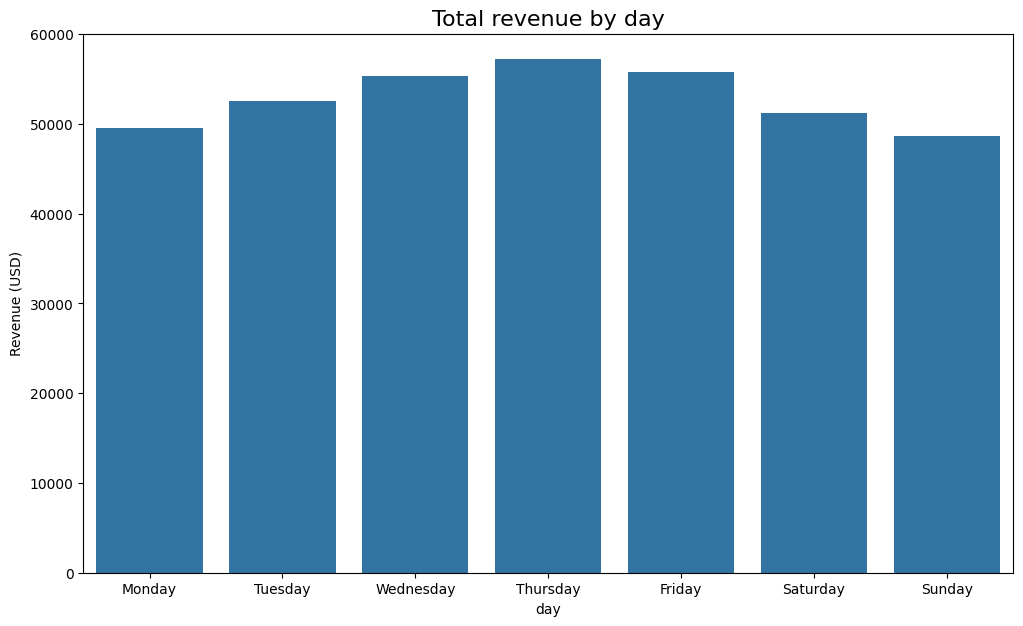

In [42]:
# barplot

plt.figure(figsize = (12,7))
plt.title('Total revenue by day', fontsize = 16)
ax = sns.barplot(x = total_amount_day.index, y = total_amount_day)
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')

Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's—more than a 10% drop.

**Plotting toatl revenue by month**

In [43]:
total_amount_month = data.groupby('month').sum(numeric_only = True)['total_amount']
total_amount_month = total_amount_month.reindex(index = month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


Text(0.5, 1.0, 'Total Revenue by Month')

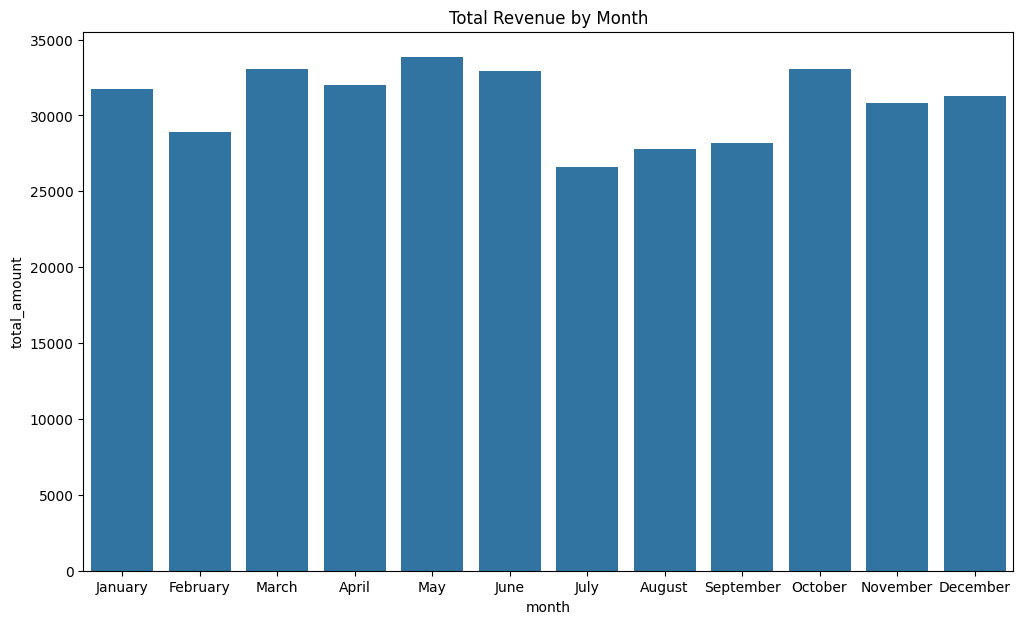

In [44]:
# barplot

plt.figure(figsize = (12,7))
ax = sns.barplot(x = total_amount_month.index, y = total_amount_month)
plt.title('Total Revenue by Month')

Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

Plotting mean trip distance by drop-off location

In [46]:
# unique drop-off location IDs

data['DOLocationID'].nunique()

216

In [48]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = data.groupby('DOLocationID').mean(numeric_only = True)[['trip_distance']]

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


Text(0.5, 1.0, 'Mean trip distance by drop-off location')

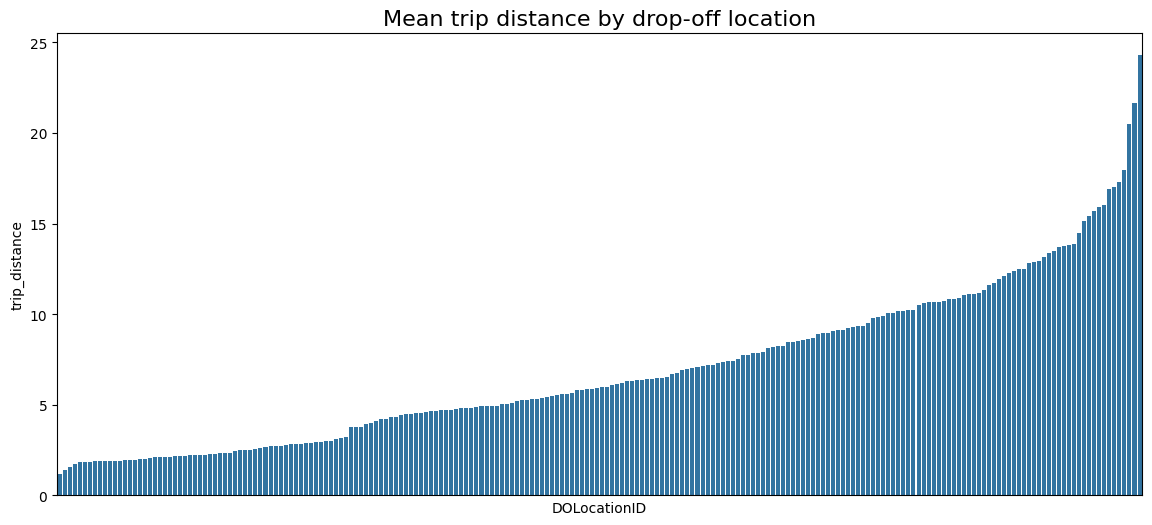

In [49]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance

plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index,
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16)

This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations.


**Histogram of rides by drop-off location**

In [55]:
# Check if all drop-off locations are consecutively numbered
data['DOLocationID'].max() - len(set(data['DOLocationID']))

49

Text(0.5, 1.0, 'Histogram of rides by drop-off location')

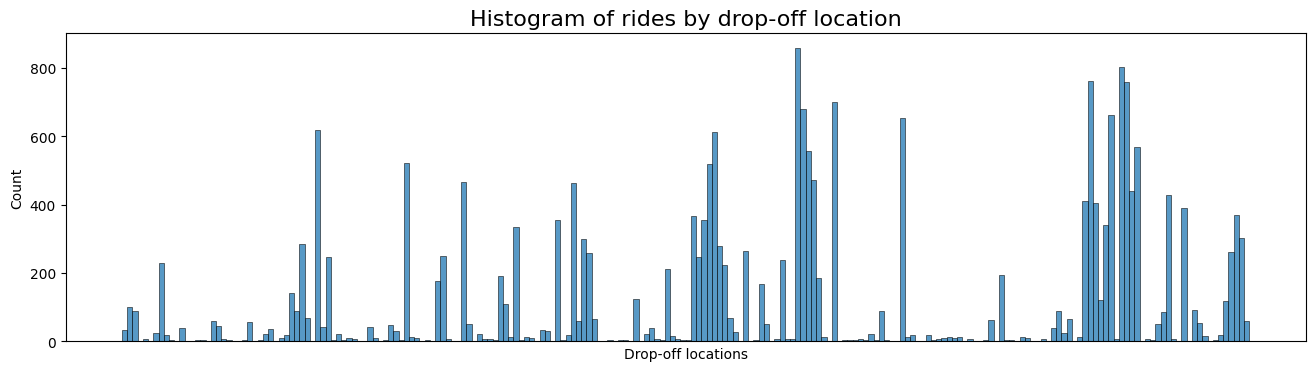

In [56]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = data['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, data['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16)

 Notice that out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips. It's likely that these high-traffic locations are near popular tourist attractions like the Empire State Building or Times Square, airports, and train and bus terminals. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, this is not in the data.

the highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. There are no missing values.

My other questions are .... There are several trips that have a trip distance of "0.0." What might those trips be? Will they impact our model?

My client would likely want to know ... that the data includes dropoff and pickup times. We can use that information to derive a trip duration for each line of data. This would likely be something that will help the client with their model.

In [58]:
data['trip_duration'] = (data['tpep_dropoff_datetime']-data['tpep_pickup_datetime'])

In [59]:
data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,0 days 00:16:43
